## Assignment: Exploring PCA and Clustering on scikit-learn's  Iris Dataset (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html):

### Part 1:
* Create some visualizations to explore the distribution of flower types.
* Apply PCA to the dataset, and then create some visualizations using the eigenvectors recieved from PCA.  Is it easier to separate the categories like this?

### Part 2:
* Research "Clustering" - what is it? Whats the purpose? How does it differ from what we've been doing?
* Apply different clustering models to the iris dataset (Drop the target column when doing this).  Analyze how accurate these models are compared to our known classes

## Summary
* PCA is a way to transform data through dimension reduction and producing a hierarchical coordinate system (the principal components)
    * the principal components are the vectors that the variance is maximized
    * If there are n features there will be n principal components 
    * Use PCA to reduce dimensionality
    * PCA is used only when there is high collinearity between the features 
* PCA is used to transform the data before applying regression or classification to maximize the dissimilarity between labels in the feature space
* Commonly used for image recognition
* Clustering is unsupervised learning
    * Generally clustering is an optimization problem for variance within a cluster and variability between clusters 

### Clustering 
* Linkage metric: determine the "distance" between 2 clusters
    * single-linkage : the shortest distance of any 2 points in 2 clusters
    * complete-linkage : the greatest distance of any 2 points in 2 clusters
    * aver
* Hierarchial clustering (not computationally efficient)
    * With n points, put each points into 1 cluster 
    * Put 2 most similar clusters into 1 cluster 
    * Continue until you get to N (desired) clusters 

* K-means:
    * Need to know how many clusters you are looking for
    * Start with k centroids and assign each point to the closest centroid
    * reassign centroid based on the average of all points in the centroid
    * reassign
    * when no changes to centroid occur, algorithm converges  

* DBSCAN:
    * Cluster based on point density 
* For more info and use cases : https://scikit-learn.org/stable/modules/clustering.html


In [126]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_score
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import pandas as pd
import seaborn as sns
import numpy as np

In [68]:
data = load_iris()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['target'])

all = X.copy()
all['target'] = y
print(list(y.value_counts()))
print(y['target'].unique())


[50, 50, 50]
[0 1 2]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

target    150
dtype: int64


Text(0.5, 1.0, 'flower type frequency')

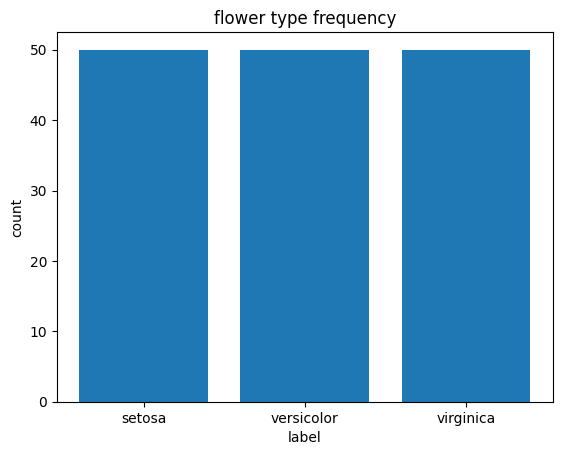

In [86]:
# Flower distribution
print(y.count())
fig, ax = plt.subplots()
ax.bar(data.target_names, list(y.value_counts()))
ax.set_xlabel("label")
ax.set_ylabel("count")
ax.set_title("flower type frequency")


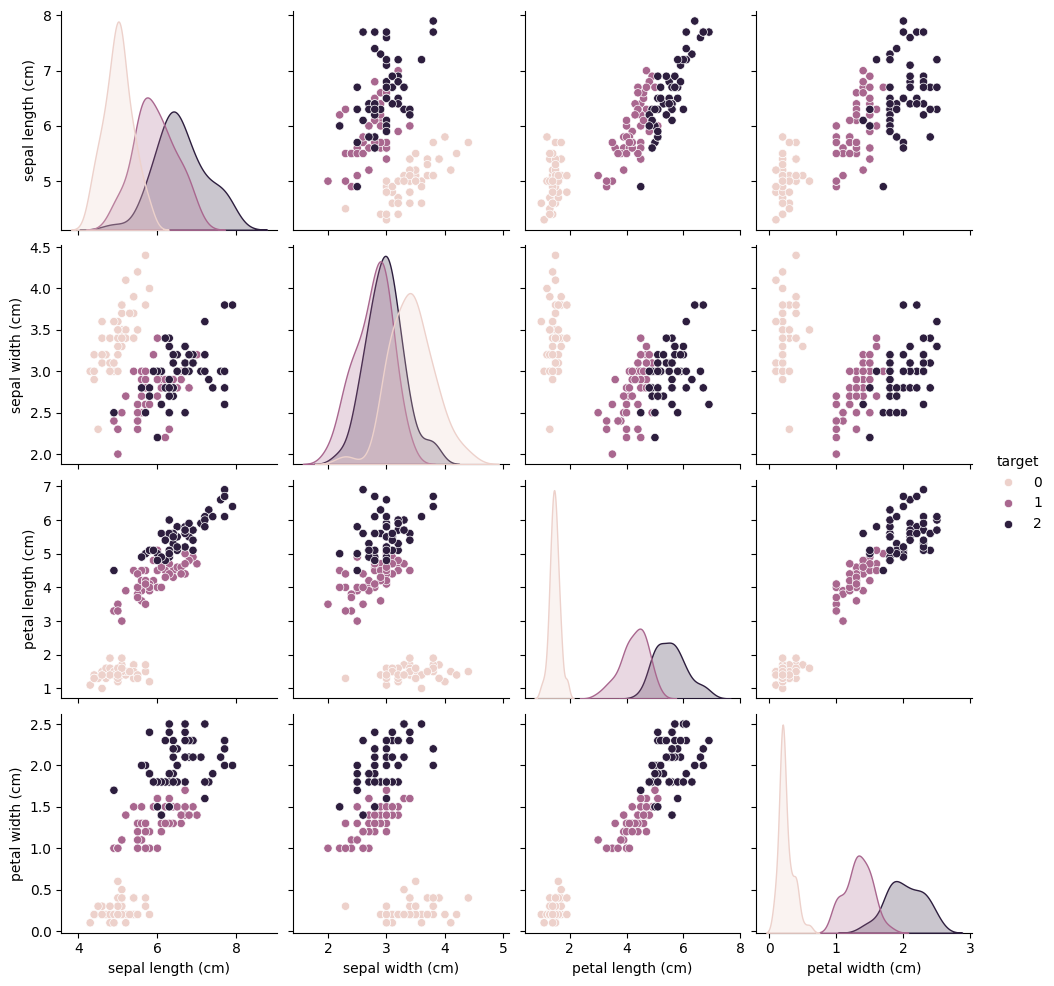

In [93]:
# Flower distributions bivariate 
sns.pairplot(all, hue = 'target')

<Axes: >

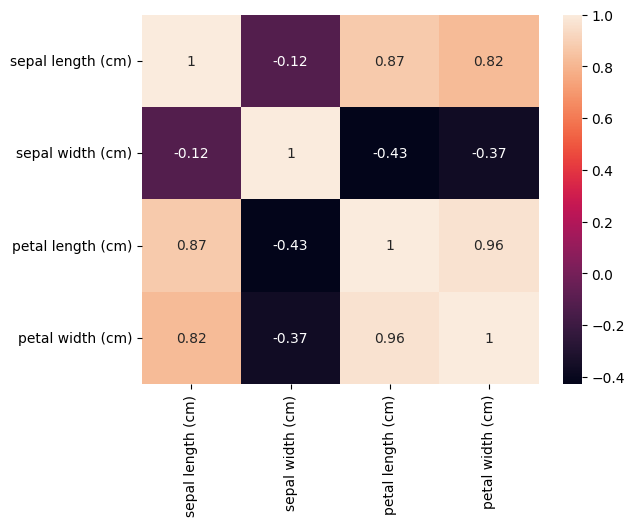

In [13]:
#Correlation Matrix: Petal width, petal length, sepal length all highly correlated
sns.heatmap(X.corr(), annot = True)

[3.15542662 0.30774761 0.87173609 0.57282662]
[0.3008044  2.72088675 0.32691415 0.41945543]
[0.85153339 0.3600896  3.14825394 1.15714519]
[0.64463205 0.39062947 1.2506104  2.66884313]
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


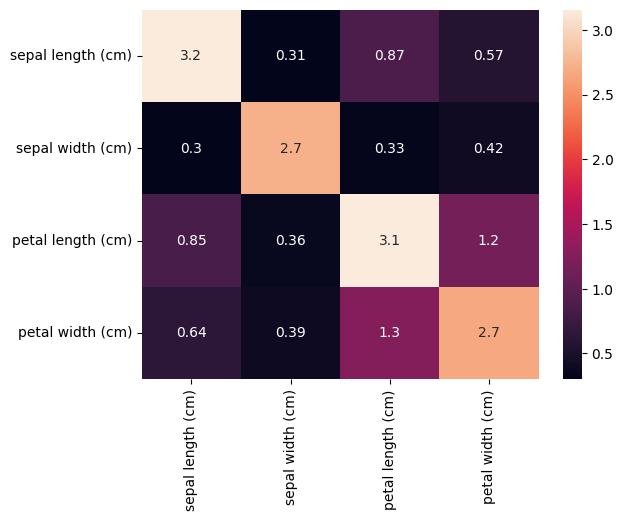

In [40]:
#Mutual Info
mi_df = pd.DataFrame(index = X.columns, columns = X.columns)
for x in X.columns:
    mi = mutual_info_regression(X, X[x])
    mi_df.loc[x] = mi
    mi_df[x] = pd.to_numeric(mi_df[x])
    print(mi)

sns.heatmap(mi_df, annot = True)
print(mi_df.dtypes)

In [144]:
#PCA 
pca = PCA()
pca.fit(X, y)
X_transform = pd.DataFrame(pca.fit_transform(X), columns = [f"PCA {x}" for x in range (1,5)])
X_transform['target'] = y
print(pca.get_covariance())
print(pca.components_)
X_transform.head()

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


,PCA 1,PCA 2,PCA 3,PCA 4,target
0,-2.684126,0.319397,-0.027915,-0.002262,0
1,-2.714142,-0.177001,-0.210464,-0.099027,0
2,-2.888991,-0.144949,0.017900,-0.019968,0
3,-2.745343,-0.318299,0.031559,0.075576,0
4,-2.728717,0.326755,0.090079,0.061259,0


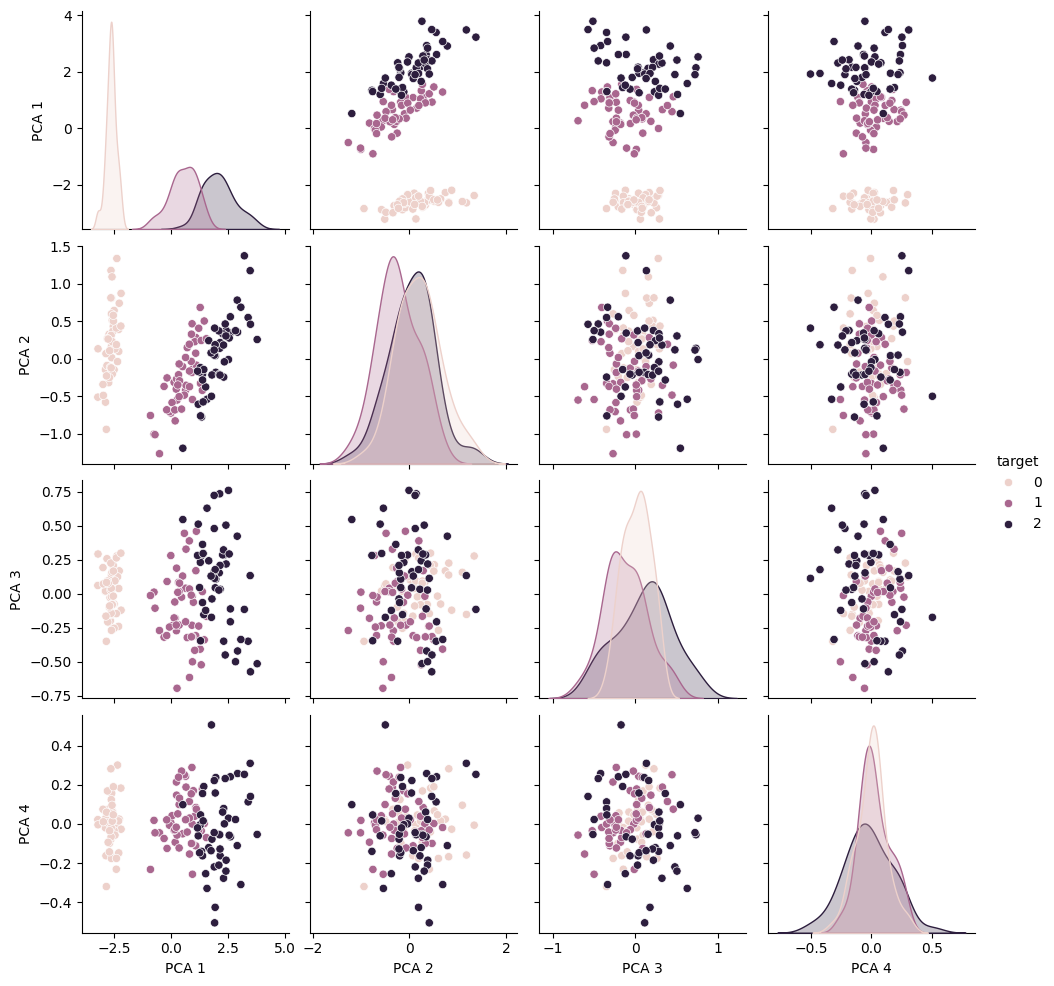

In [145]:
#Plotting transformed data 
sns.pairplot(X_transform, hue = 'target')

InvalidIndexError: (slice(None, None, None), 0)

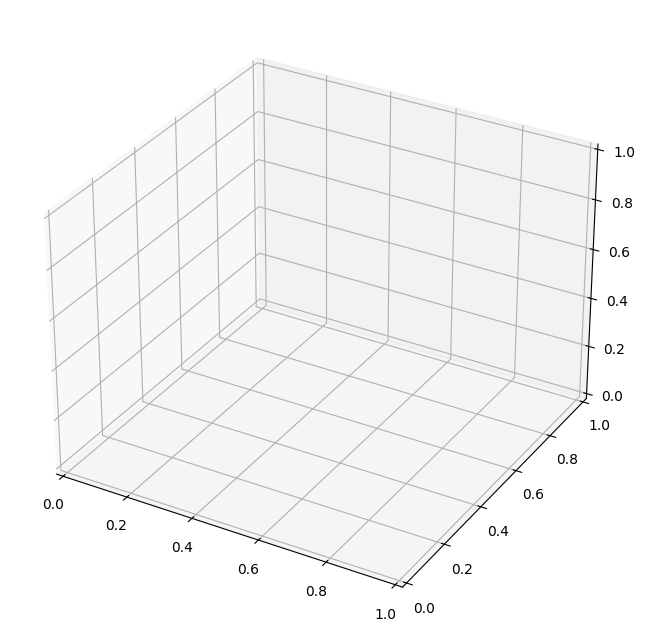

In [139]:
def biplot3D(score, coeff, labels=None):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    xs = score[:, 0]
    ys = score[:, 1]
    zs = score[:, 2]
    n = coeff.shape[0]
    for i in range(n):
        ax.quiver(0, 0, 0, coeff[i, 0], coeff[i, 1], coeff[i, 2], color='r', alpha=0.5)
        if labels is None:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, coeff[i, 2] * 1.15, f'Var {i + 1}', color='g',
                    ha='center', va='center')
        else:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, coeff[i, 2] * 1.15, labels[i], color='g',
                    ha='center', va='center')
    ax.scatter(xs, ys, zs, c=iris.target, cmap='viridis', alpha=0.5)
    ax.set_title('Biplot for PCA (3D)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_box_aspect([1, 1, 1])
    plt.show()

biplot3D(X_transform, np.transpose(pca.components_), labels=data.target_names)

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

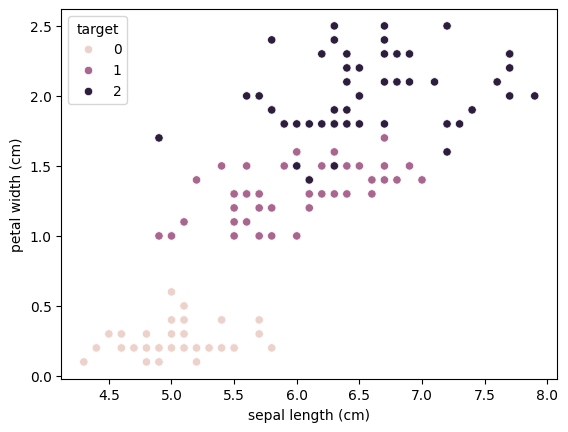

In [96]:
sns.scatterplot(x = 'sepal length (cm)', y = 'petal width (cm)', data = all, hue = 'target')

### Clustering Algorithms 
### Performance evaluation
* Adjusted rand:
* Rand: correct labels / total labels
* Silhouette: 

In [149]:
# Clustering Algs Performance evaluation: 
stats = pd.DataFrame(columns = ['model', 'adjusted rand', 'rand', 'silhouette'])
models = [cluster.KMeans(n_clusters=3), cluster.AffinityPropagation(), cluster.DBSCAN()]
for m in models:
    model = m
    model.fit(X_transform)
    adj_rand = adjusted_rand_score(np.array(all['target']), model.labels_)
    rand = rand_score(np.array(all['target']), model.labels_)
    sil = silhouette_score(X, model.labels_)
    stats.loc[len(stats.index)] = [str(model), adj_rand, rand, sil]



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'adjusted rand score')

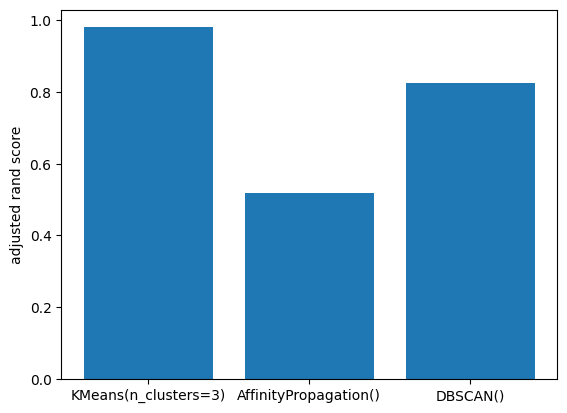

In [152]:
fig, ax = plt.subplots()
ax.bar(stats['model'], stats['adjusted rand'])
ax.set_ylabel('adjusted rand score')


In [150]:
stats.head()

,model,adjusted rand,rand,silhouette
0,KMeans(n_clusters=3),0.979932,0.991141,0.511150
1,AffinityPropagation(),0.518595,0.817002,0.314935
2,DBSCAN(),0.824741,0.926174,0.424513
